# Keras Time Series Anomaly Detection

# Introduction

In this notebook, a neural network is developed using Keras to detect anomalies in the Numenta Anomaly benchmark dataset. The code and plots have been adapted from the Keras documentation, which can be accessed via the below link.

https://keras.io/examples/timeseries/timeseries_anomaly_detection/.

### Overview of Machine Learning and Neural Networks

Machine learning is an area of computer science that allows computers to learn and act without being specifically programmed to do so. It entails building and adapting models that allow programmes to learn through experience. Algorithms are constructed to  adapt the models, which in turn gradually improves the predictions made by the programme.

The machine learning process begins with input data, such as examples, direct experience or instruction. The algorithm will look for patterns in the data so it can later make predictions based on the examples provided. There are several ways the algorithm can be trained to identify patterns in data, including the following:
- Supervised Learning: This is the most practical and widely used form of ML. It involves creating a function that relates input variables to labelled output values. The model is trained until it can detect the underlying patterns and relationships between the input and output data, meaning it can accurately predict output labels when presented with an entirely new dataset.In the real world, applications of supervised learning include risk assessment, image classification,fraud detection etc.
- Unsupervised Learning: In this form, algorithims are trained on unlabeled data, and scans through the data sets looking for any meaningful connections. Hence, in unsupervised learning the algorithm finds the patterns/similarities within the data instead of relating the data to an external measurement.
- Semi-supervised Learning: This is a combination of the two previous approaches. This is where unsupervised learning algorithms generate labels for input data, which are then fed into supervised learning algorithms. In this approach, some of the input data is labelled by humans, and some are guessed by unsupervised learning, and all these datapoints/labels are given to supervised learning algorithms to generate the AI model. 


### Keras Overview
Keras is an open-source Neural Network library written in Python, capable of running on TensorFlow, which is an end-to-end machine learning framework developed by Google. 

### The Numenta Anomaly Benchmark (NAB)

The ability to detect anomalies in data sets has numerous applications in fields such as fraud detection for credit cards, fault detection in safety critical systems and to detect network breaches in cybersecurity. Due to its wide range of potential uses, the problem of anomaly detection has been thoroughly researched, and several algorithms for this purpose have been proposed. However, there was no dataset or framework available for evaluating and benchmarking these algorithims; hence the Numenta Anomaly Benchmark was introduced in 2015. The NAB was developed by Numenta, which is a research company blending neuroscience and machine learning to drive advances in the field of Artificial intellegence.

The NAB is an open-source framework used to evaluate and compare anomaly detection algorithms. It includes a set of open-access, labelled data files and a common scoring system to compare the ability of different algorithms to detect anomalies in streaming data. Anomalies are patterns that do not match with previous patterns of behaviour for the relevant data stream. 

#### Data Files

In addition to simulated data files, the NAB also includes real-world data with outliers/anomalies that have known causes. These data files have been collected by Numenta over years of interacting with customers and resolving their anomaly-related issues. The NAB dataset includes a wide range of different metrics, such as IoT sensor output, social media activity, web server traffic and network utilization data. For these metrics, a range of anomaly types are included - for example, both planned system shutdowns and real failures, as different behaviour should be displayed for different types. The files also include some challenges in terms of anomaly detection, such as noise  In addition, data files without anomalies are included as a reference point. 

#### Anomaly Detection Scoring
An anomaly detection algorithm has two main functions: accepting data input such as that from the NAB files, and flagging anomalies within this data. According to Numenta, the perfect detector is one that:
- Works in real time
- Detects all anomalies in streaming data
- Is fully automated across all potential datasets
- Detects anomalies as soon as possible
- Does not supply any false positives.

The scoring mechanism proposed by the NAB, which aims to recognize algorithms with these traits, consists of three main components: 

1. Anomaly Windows
Anomaly windows are defined ranges of data points that surround a recorded anomaly, which represent the time immediately before/after the anomaly occurs. Points are awarded to algorithms that detect anomalies within this window, hence giving credit to algorithms capable of early detection. If an algorithm is detected outside the window, it is marked as a false positive and given a negative score.

2. Scoring Function
The scoring function is connected to the anomaly window; as mentioned above, positive scores are given for detections within the anomaly window and negative scores for detections outside the window.

3. Application Profiles
Application profiles acknowledge that the value/implications of false negatives and positives vary between industries and applications. For example, a false negative on a hospital EKG tracker may have much more serious effects on patient helat than a false positive. 

#### Source Data

The NAB source files are available on Kaggle at the below link:

[NAB Source Data](https://www.kaggle.com/datasets/boltzmannbrain/nab)

Below is the link to the Github repository for the project:

[GitHub Link](https://github.com/numenta/NAB)

As mentioned above, numerous real-world datasets are available, such as the following:
- AWS Server Metrics: Collected by AmazonCloudwatch Service. Metrics include CPU utilization, Network Bytes in and Disk Read bytes.
- Real Tweets: Collections of Twitter mentions of publicly traded companies, such as Google and IBM. 
- NYC Taxi Data: Number of of NYC taxi passengers, where anomalies include the NYC marathon, Thanksgiving, Christmas and a snow storm.

There are also two types of artificially-generated data:
- artificialNoAnomaly: Simulated data without anomalies
- artificalWithAnomaly: Simulated data with varying types of anomaly

This notebook uses one of the artificial data sets - daily_small_noise and daily_jump_up. Both files emulate the same data source, but while daily_small_noise does not contain any anomalies, these are present in daily_jump_up.

The code in this notebook demonstrates how a neural network, developed using Keras, can be trained to detect anomalies in the second file, by using the first file as a training data source.

# Loading the data

### Python Packages

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

### Data Sources

Both data sources are available on the NAB Github repository in CSV format. The below code gets the files in raw format that can be then fed into a Pandas dataframe - linking directly to Github will cause issues as HTML will be returned along with the CSV data.

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

### Pandas Dataframes

The below code reads the small_noise dataset and converts it to a Pandas dataframe. The parse_dates parameter allows the timestamp for the measurement to be interpreted as a datetime field, and the index_col paramaterconverts the timestamp column to the index column. 

In [76]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

Below we can see that the data frame is generated as expected, with the timestamp used as an index column instead of the default column number.

In [77]:
# 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


Below descriptive statistics are generated for the dataset - in total there are 4032 values counted, which also can be checked by getting the shape of the dataframe. 

In [80]:
# 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [79]:
df_small_noise.shape

(4032, 1)

We can also repeat this for the daily_jump_up dataset to see if any significant differences between the two are apparent. 

In [82]:
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [83]:
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [84]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [85]:
df_daily_jumpsup.shape

(4032, 1)

Based on this initial analysis, we can see the following characteristics for the two datasets:
- The same number of observations/measurements exist for both datasets.
- The mean value is slightly higher in the daily_jump_up dataset
- The values for upper, median and lower quartiles are similar across the two datasets
- The max value in the jump_up dataset is twice that of the small_noise dataset - this is likely due to the recorded anomaly in the jump_up data. 

### Pandas Dataframes

Below the data from the small_noise dataset is plotted. We can see that the data is relatively uniform, with peaks occurring betwwen 80 and 90 at approximately the same time intervals.

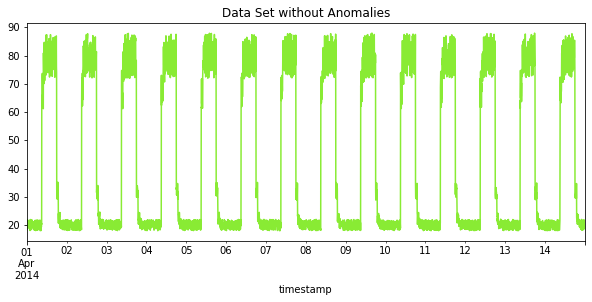

In [94]:
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax, color="#89eb34");
ax.set_title("Data Set without Anomalies");

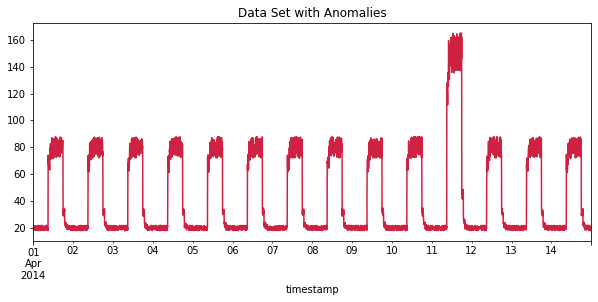

In [93]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax, color = "#cf2141");
ax.set_title("Data Set with Anomalies");

We can see the data distribution is very similar to that of the first dataset, except for one measurement that reaches approximately 160.

## Preprocessing

***

### Data Normalization

Once both datasets have been converted to Pandas dataframes, the next step is to normalize the data.

Data is normalized by subtracting each value in the dataset from the mean, and dividing the result by the standard deviation. The main benefit of normalizing input data for neural networks is that it simplifies the traning process. For data that has not undergone this step, numerical ranges of different features may differ significantly. For example, a machine learning application that predicts house prices may consider different numerical factors, such as age of the house or square footage. In this scenario, the potential ranges for these two variables would be very different. House ages may be in the range of 0 to 25, while square footage may vary between 100 and 500 m<sup>2</sup>. If this data was given to the algorithm in its unnormalized form, the rate of convergence for the neural network will be adversely affected. Convergence is the stage at which no further improvements or changes to the model are expected. It is the point at which the learning rate decreases and the cost for the algorithm reaches its minimum value. If the input datasets are all on the same scale (normalized, generally between -1 and 1), the time taken to reach the point of convergence is signficantly reduced.

Below, the small noise data set is normalized, and the normalized data is added to a new column in the dataframe called df_train_vals.

First, the mean and standard deviation values are obtained.

In [20]:
# 
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [21]:
# 
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

Next, the mean is subtracted from each datapoint, and the result divided by the standard deviation. This is saved to a new column, df_train_vals. These values will be used to train the anomaly detection algorithm.

In [22]:
df_train_vals = (df_small_noise - train_mean) / train_std

In [23]:
# Sanity check for training data
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [24]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [25]:
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [26]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.43835333580657, 5.018912974813406e-15, 1.7975039446312059e-16)

In [27]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000016)

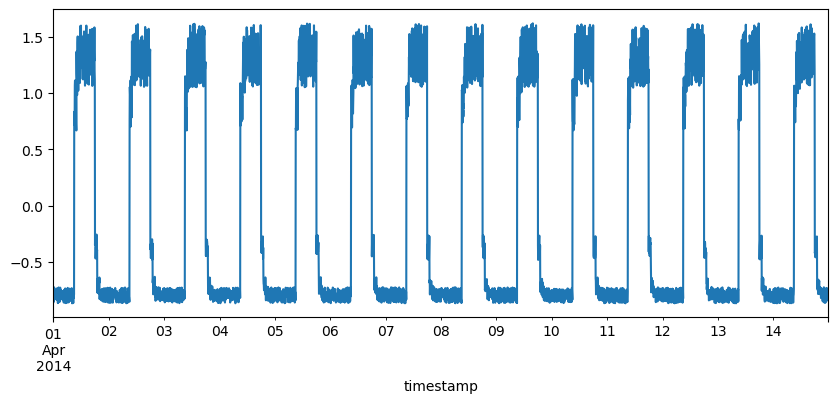

In [28]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [29]:
# 
df_train_vals.shape

(4032, 1)

In [30]:
# 
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [31]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [32]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [33]:
# Remove brackets.
len(L) - win_size + 1

10

In [34]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [35]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [36]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [37]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [38]:
# 
x_train = windows(df_train_vals)

In [39]:
# 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [40]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [41]:
# 
x_train.shape

(3745, 288, 1)

In [42]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [43]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

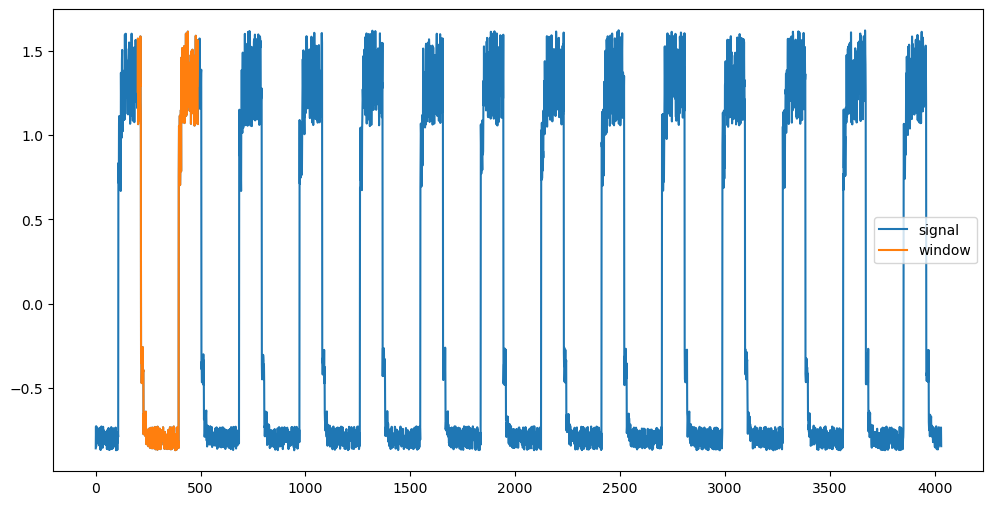

In [44]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

## Neural Network

***

In [45]:
x_train.shape

(3745, 288, 1)

In [46]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [47]:
#
model = keras.Sequential(layers)

In [48]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [49]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [51]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 2s 33ms/step - loss: 0.4906 - val_loss: 0.0840
Epoch 2/50
27/27 [==============================] - 1s 21ms/step - loss: 0.0758 - val_loss: 0.0397
Epoch 3/50
27/27 [==============================] - 1s 21ms/step - loss: 0.0550 - val_loss: 0.0347
Epoch 4/50
27/27 [==============================] - 1s 22ms/step - loss: 0.0460 - val_loss: 0.0298
Epoch 5/50
27/27 [==============================] - 1s 22ms/step - loss: 0.0401 - val_loss: 0.0260
Epoch 6/50
27/27 [==============================] - 1s 22ms/step - loss: 0.0352 - val_loss: 0.0227
Epoch 7/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0316 - val_loss: 0.0203
Epoch 8/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0291 - val_loss: 0.0187
Epoch 9/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0270 - val_loss: 0.0191
Epoch 10/50
27/27 [==============================] - 1s 22ms/step - loss: 0.0255 - val_loss: 0.0179
Epoch 11/

## Evaluation

***

In [52]:
history.history["loss"]

[0.49058735370635986,
 0.0758185014128685,
 0.05499966815114021,
 0.04595070704817772,
 0.04005083441734314,
 0.03524336591362953,
 0.03164775297045708,
 0.029113229364156723,
 0.027001045644283295,
 0.025452781468629837,
 0.024051306769251823,
 0.022816941142082214,
 0.02182421088218689,
 0.020918335765600204,
 0.020198170095682144,
 0.019363485276699066,
 0.018756574019789696,
 0.018022119998931885,
 0.017487309873104095,
 0.016870446503162384,
 0.016310442239046097,
 0.015788784250617027]

In [53]:
history.history["val_loss"]

[0.0839756652712822,
 0.039692364633083344,
 0.03469044342637062,
 0.02975563518702984,
 0.02604989893734455,
 0.02268984727561474,
 0.020261501893401146,
 0.018700698390603065,
 0.019140327349305153,
 0.017922986298799515,
 0.01626848801970482,
 0.016679106280207634,
 0.01580974832177162,
 0.016389532014727592,
 0.01663123071193695,
 0.015740690752863884,
 0.015100914053618908,
 0.015837514773011208,
 0.016766972839832306,
 0.015527171082794666,
 0.016168564558029175,
 0.017420712858438492]

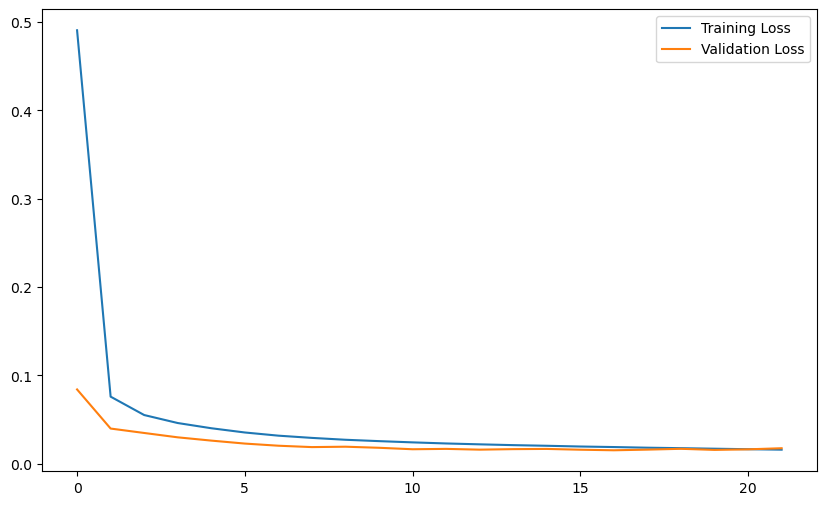

In [54]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [55]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 3ms/step


In [56]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

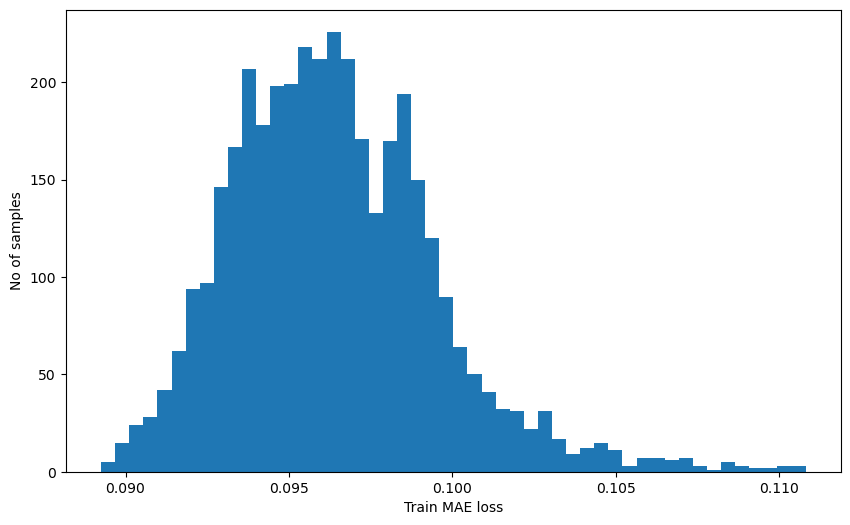

In [57]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [58]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.110807412462609

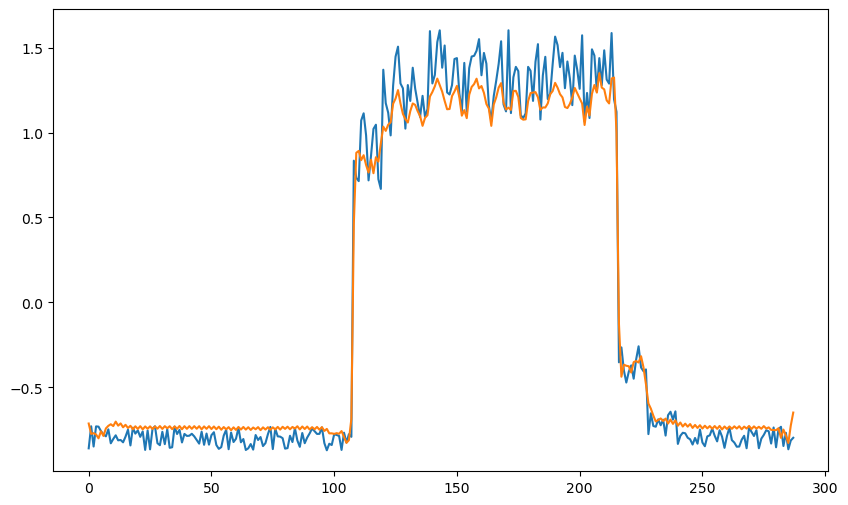

In [59]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [60]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

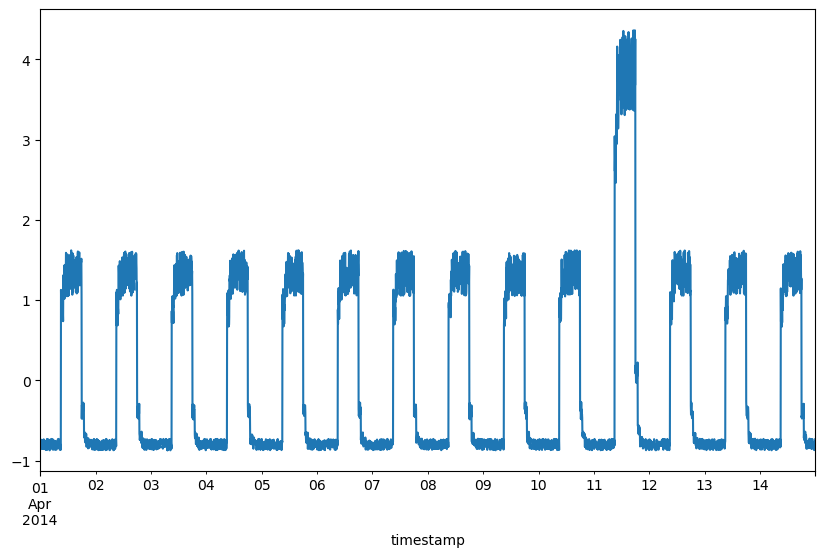

In [61]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [62]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [63]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 0s 4ms/step


In [64]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.0930413 ],
       [0.09290566],
       [0.09190709],
       ...,
       [0.09277858],
       [0.09490076],
       [0.09401169]])

In [65]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.0930413 , 0.09290566, 0.09190709, ..., 0.09277858, 0.09490076,
       0.09401169])

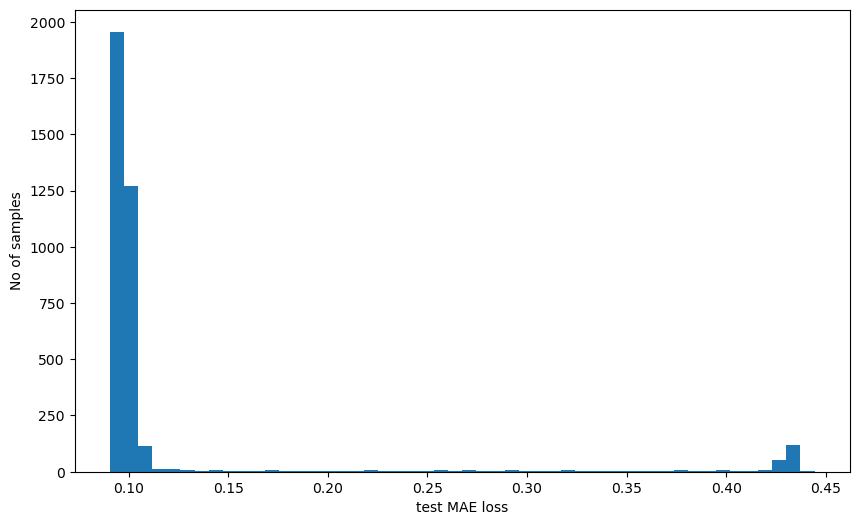

In [66]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [67]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

409

In [68]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [69]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

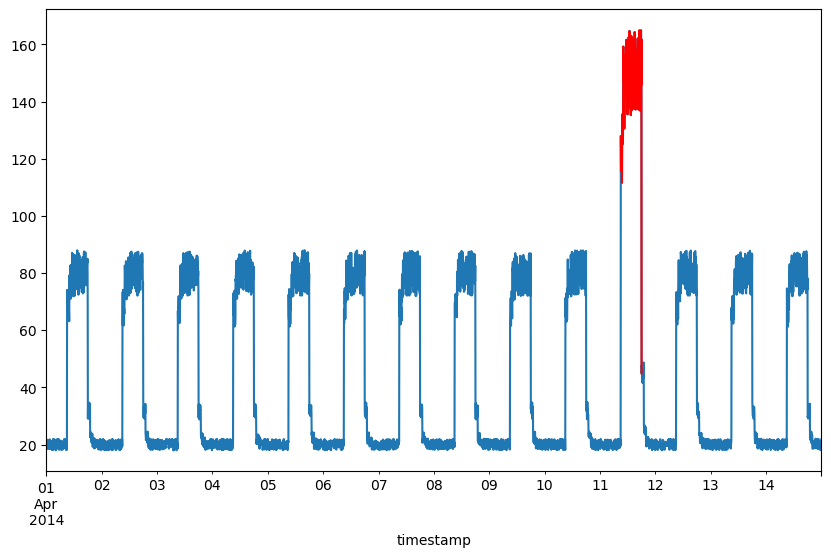

In [70]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

***

## End